In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [26]:

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

In [27]:
import pandasql as psql

loan = pd.read_csv(r"C:\Users\NIKITHA PAGADALA\Downloads\loan_data.csv", header=0)

# Copy the file to back-up file

loan_bk = loan.copy()

# Display first 5 records

loan.tail()

loan=loan.rename(columns={'not.fully.paid':'NFpaid'},inplace=False)

In [28]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  NFpaid             9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [29]:
loan.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
NFpaid               0
dtype: int64

In [30]:
loan_dup=loan[loan.duplicated(keep='last')]
loan_dup

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,NFpaid


In [31]:
loan.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'NFpaid'],
      dtype='object')

In [32]:
loan['credit.policy'].value_counts()

credit.policy
1    7710
0    1868
Name: count, dtype: int64

In [33]:
loan=loan.drop(['credit.policy'],axis=1)

In [34]:
loan['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [35]:
loan['purpose']

0       debt_consolidation
1              credit_card
2       debt_consolidation
3       debt_consolidation
4              credit_card
               ...        
9573             all_other
9574             all_other
9575    debt_consolidation
9576      home_improvement
9577    debt_consolidation
Name: purpose, Length: 9578, dtype: object

In [36]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
loan['purpose']=LE.fit_transform(loan[['purpose']])

In [37]:
loan['purpose']

0       2
1       1
2       2
3       2
4       1
       ..
9573    0
9574    0
9575    2
9576    4
9577    2
Name: purpose, Length: 9578, dtype: int32

In [38]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   purpose            9578 non-null   int32  
 1   int.rate           9578 non-null   float64
 2   installment        9578 non-null   float64
 3   log.annual.inc     9578 non-null   float64
 4   dti                9578 non-null   float64
 5   fico               9578 non-null   int64  
 6   days.with.cr.line  9578 non-null   float64
 7   revol.bal          9578 non-null   int64  
 8   revol.util         9578 non-null   float64
 9   inq.last.6mths     9578 non-null   int64  
 10  delinq.2yrs        9578 non-null   int64  
 11  pub.rec            9578 non-null   int64  
 12  NFpaid             9578 non-null   int64  
dtypes: float64(6), int32(1), int64(6)
memory usage: 935.5 KB


In [39]:
count=loan.NFpaid.value_counts()
print('class 0:',count[0])
print('class 1:',count[1])
print('proportion:',round(count[0]/count[1],2),':1')
print("total churn modelling records",len(loan))

class 0: 8045
class 1: 1533
proportion: 5.25 :1
total churn modelling records 9578


In [40]:
Target_var='NFpaid'
independent_var=[]

for col in loan.columns:
    if col!=Target_var:
        independent_var.append(col)

x=loan[independent_var]
y=loan[Target_var]


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((6704, 12), (2874, 12), (6704,), (2874,))

In [42]:
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train[independent_var]=mmscaler.fit_transform(x_train[independent_var])
x_test[independent_var]=mmscaler.fit_transform(x_test[independent_var])
x_train=pd.DataFrame(x_train)
x_train=pd.DataFrame(x_train)

In [43]:
from sklearn.ensemble import RandomForestClassifier
ModelRF=RandomForestClassifier()
ModelRF.fit(x_train,y_train)
y_pred=ModelRF.predict(x_test)
y_pred_prob=ModelRF.predict_proba(x_test)

Confusion matrix : 
 [[  14  478]
 [  29 2353]]
Outcome values : 
 14 478 29 2353
Classification report : 
               precision    recall  f1-score   support

           1       0.33      0.03      0.05       492
           0       0.83      0.99      0.90      2382

    accuracy                           0.82      2874
   macro avg       0.58      0.51      0.48      2874
weighted avg       0.74      0.82      0.76      2874

Accuracy : 82.4 %
Precision : 32.6 %
Recall : 2.8 %
F1 Score : 0.052
Specificity or True Negative Rate : 98.8 %
Balanced Accuracy : 50.8 %
MCC : 0.051
roc_auc_score: 0.508


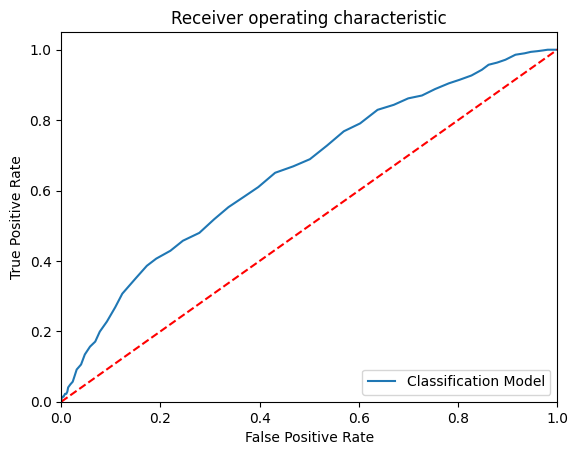

In [44]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelRF.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [45]:

Results = pd.DataFrame({'_P':y_pred})
ResultsFinal = loan_bk.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,_P
361,1,debt_consolidation,0.0983,289.69,9.980449,4.83,712,1620.041667,7263,39.0,0,0,0,0,0
41,1,debt_consolidation,0.0743,155.38,11.695247,2.29,777,3540.000000,8379,16.9,0,0,0,0,0
2230,1,educational,0.0963,107.52,11.255449,7.30,717,3420.041667,14578,56.1,0,0,0,0,0
1992,1,all_other,0.0800,115.95,10.239817,7.84,772,1591.041667,1271,8.7,1,0,0,0,0
1989,1,debt_consolidation,0.1126,345.07,11.036501,3.61,722,3690.000000,14080,31.2,0,0,0,0,0
797,1,debt_consolidation,0.1292,168.28,10.647803,21.04,677,2910.958333,13073,55.9,3,0,0,1,0
1454,1,credit_card,0.1051,126.78,11.225243,20.23,707,4619.958333,4508,30.7,0,0,0,0,0
2422,1,home_improvement,0.1347,254.42,11.081465,6.76,687,4680.000000,9463,83.7,1,0,0,0,0
1399,1,credit_card,0.1178,165.55,10.757903,22.49,692,8160.000000,0,0.0,3,0,1,1,0
2567,1,all_other,0.0963,160.48,10.718941,11.12,732,2400.000000,4637,12.6,1,0,0,0,0


In [46]:
from sklearn.tree import DecisionTreeClassifier
ModelDt=DecisionTreeClassifier()
ModelDt.fit(x_train,y_train)
y_pred=ModelDt.predict(x_test)
y_pred_prob=ModelDt.predict_proba(x_test)

Confusion matrix : 
 [[ 173  319]
 [ 658 1724]]
Outcome values : 
 173 319 658 1724
Classification report : 
               precision    recall  f1-score   support

           1       0.21      0.35      0.26       492
           0       0.84      0.72      0.78      2382

    accuracy                           0.66      2874
   macro avg       0.53      0.54      0.52      2874
weighted avg       0.74      0.66      0.69      2874

Accuracy : 66.0 %
Precision : 20.8 %
Recall : 35.2 %
F1 Score : 0.262
Specificity or True Negative Rate : 72.4 %
Balanced Accuracy : 53.8 %
MCC : 0.063
roc_auc_score: 0.538


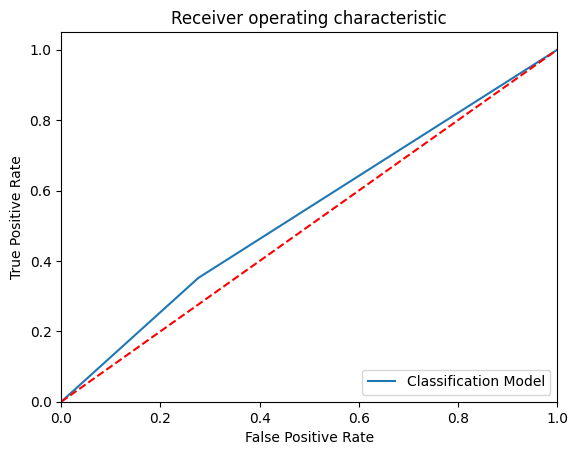

In [47]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelDt.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 

In [48]:
from sklearn.ensemble import ExtraTreesClassifier
ModelET=ExtraTreesClassifier()
ModelET.fit(x_train,y_train)
y_pred=ModelET.predict(x_test)
y_pred_prob=ModelET.predict_proba(x_test)

Confusion matrix : 
 [[  11  481]
 [  20 2362]]
Outcome values : 
 11 481 20 2362
Classification report : 
               precision    recall  f1-score   support

           1       0.35      0.02      0.04       492
           0       0.83      0.99      0.90      2382

    accuracy                           0.83      2874
   macro avg       0.59      0.51      0.47      2874
weighted avg       0.75      0.83      0.76      2874

Accuracy : 82.6 %
Precision : 35.5 %
Recall : 2.2 %
F1 Score : 0.042
Specificity or True Negative Rate : 99.2 %
Balanced Accuracy : 50.7 %
MCC : 0.051
roc_auc_score: 0.507


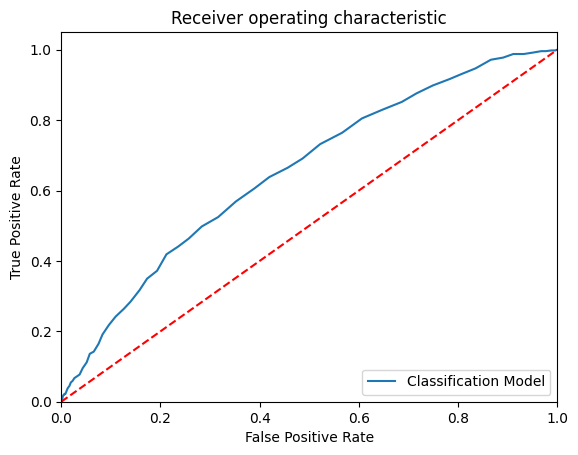

In [49]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Actual values

actual = y_test

# Predicted values

predicted = y_pred

# Confusion matrix

matrix = confusion_matrix(actual,predicted, labels=[1,0], sample_weight=None, normalize=None)
print('Confusion matrix : \n', matrix)

# Outcome values order in sklearn

tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# Classification report for precision, recall f1-score and accuracy

C_Report = classification_report(actual,predicted,labels=[1,0])

print('Classification report : \n', C_Report)

# Calculating the metrics

sensitivity = round(tp/(tp+fn), 3);
specificity = round(tn/(tn+fp), 3);
accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
precision = round(tp/(tp+fp), 3);
f1Score = round((2*tp/(2*tp + fp + fn)), 3);

# Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
# A model with a score of +1 is a perfect model and -1 is a poor model

from math import sqrt

mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

print('Accuracy :', round(accuracy*100, 2),'%')
print('Precision :', round(precision*100, 2),'%')
print('Recall :', round(sensitivity*100,2), '%')
print('F1 Score :', f1Score)
print('Specificity or True Negative Rate :', round(specificity*100,2), '%')
print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
print('MCC :', MCC)

# Area under ROC curve 

from sklearn.metrics import roc_curve, roc_auc_score

print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))

# ROC Curve

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
model_roc_auc = roc_auc_score(actual, predicted)
fpr, tpr, thresholds = roc_curve(actual, ModelET.predict_proba(x_test)[:,1])
plt.figure()
#----------------------------------------------------
plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show() 